<a href="https://colab.research.google.com/github/Kot71nsk/Parkinson/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%96_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-12-24 08:33:33--  https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [application/x-www-form-urlencoded]
Saving to: ‘parkinsons.data’

parkinsons.data     100%[===================>]  39.74K  --.-KB/s    in 0.1s    

2024-12-24 08:33:33 (310 KB/s) - ‘parkinsons.data’ saved [40697/40697]

[0]	validation_0-logloss:0.54645	validation_1-logloss:0.59297
[1]	validation_0-logloss:0.54386	validation_1-logloss:0.58953
[2]	validation_0-logloss:0.54130	validation_1-logloss:0.58613
[3]	validation_0-logloss:0.53876	validation_1-logloss:0.58299
[4]	validation_0-logloss:0.53624	validation_1-logloss:0.57986
[5]	validation_0-logloss:0.53375	validation_1-logloss:0.57656
[6]	validation_0-logloss:0.53128	validation_1-logloss:0.

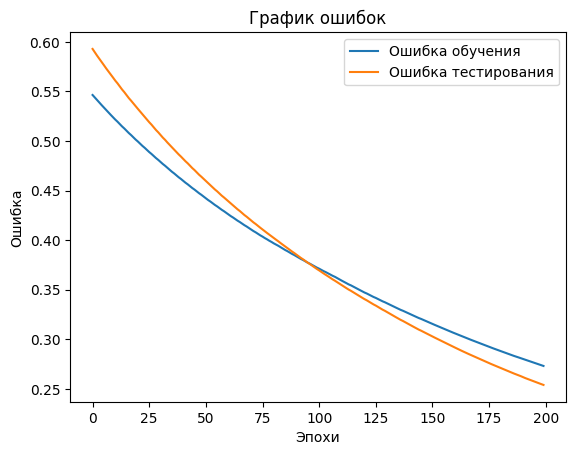

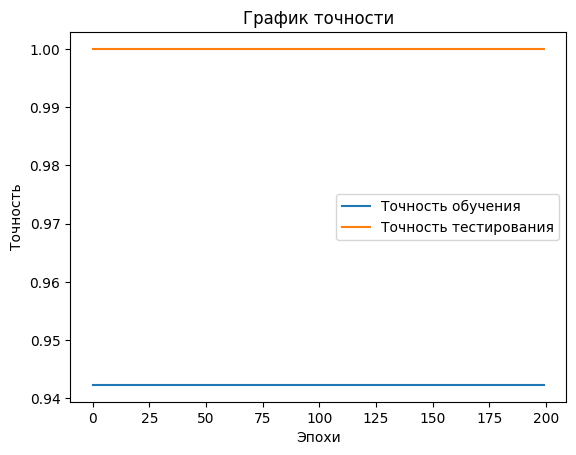

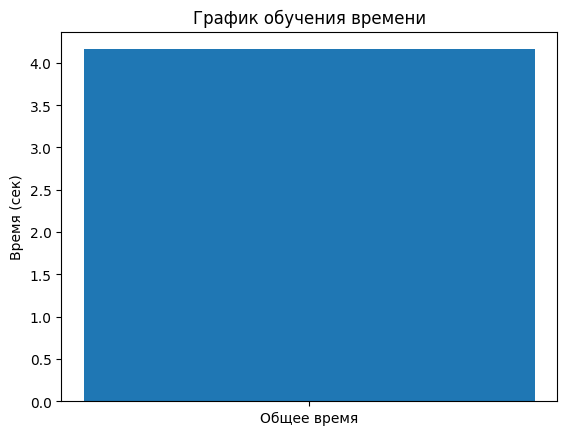

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Загрузка данных
!wget https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data
df = pd.read_csv('parkinsons.data', na_values='?', engine='python')

# Удаление ненужного столбца
df = df.drop('name', axis=1)

# Обработка пропущенных значений
df = df.replace('?', np.nan)
numerical_cols = df.select_dtypes(include=np.number).columns

if len(numerical_cols) > 0:  # Проверка, что есть числовые колонки для обработки
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
else:
    print("Ошибка: В данных нет числовых столбцов для обработки.")
    exit()

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('status', axis=1)
y = df['status']

# Преобразование в NumPy массивы
X = X.values
y = y.values

# Визуализация распределения признаков до логарифмического преобразования
plt.figure(figsize=(12, 6))
for i in range(min(5, X.shape[1])):  # Визуализируем первые 5 признаков
    plt.subplot(2, 3, i + 1)
    sns.histplot(X[:, i], bins=30, kde=True)
    plt.title(f'Распределение признака {i + 1} до преобразования')
plt.tight_layout()
plt.show()

# Логарифмическое преобразование признаков
X = np.log1p(X)  # log1p эквивалентно log(X + 1)

# Визуализация распределения признаков после логарифмического преобразования
plt.figure(figsize=(12, 6))
for i in range(min(5, X.shape[1])):  # Визуализируем первые 5 признаков
    plt.subplot(2, 3, i + 1)
    sns.histplot(X[:, i], bins=30, kde=True)
    plt.title(f'Распределение признака {i + 1} после преобразования')
plt.tight_layout()
plt.show()

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Создание и обучение модели XGBoost
model = XGBClassifier(learning_rate=0.005, max_depth=3, n_estimators=200)

eval_set = [(X_train, y_train), (X_test, y_test)]
start_time = time.time()
model.fit(X_train, y_train, eval_set=eval_set)
end_time = time.time()

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

# Вывод графика ошибок
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Ошибка обучения')
ax.plot(x_axis, results['validation_1']['logloss'], label='Ошибка тестирования')
ax.legend()
plt.ylabel('Ошибка')
plt.xlabel('Эпохи')
plt.title('График ошибок')
plt.show()

# Вывод графика точности
train_accuracy = [accuracy_score(y_train, model.predict(X_train)) for _ in range(epochs)]
test_accuracy = [accuracy_score(y_test, model.predict(X_test)) for _ in range(epochs)]
fig, ax = plt.subplots()
ax.plot(x_axis, train_accuracy, label='Точность обучения')
ax.plot(x_axis, test_accuracy, label='Точность тестирования')
ax.legend()
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.title('График точности')
plt.show()

# Вывод графика обучения времени модели
training_time = end_time - start_time  # В секундах
fig, ax = plt.subplots()
ax.bar(['Общее время'], [training_time])
plt.ylabel('Время (сек)')
plt.title('График обучения времени')
plt.show()
